In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 【問題1】練習のために特徴量とカテゴリを選択

## irisデータセットより「versicolorとvirginica」と「sepal_lengthとpetal_length」を抽出する

In [2]:
iris = load_iris() # irisデータの読み込み

df_X = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width']) # インデックス付きの2次元データ（データフレーム）で取得
df_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
ser_y = pd.DataFrame(iris.target, columns=["species"]) # インデックス付きの2次元データ（Series）で取得
#y = y.replace({0: 'setosa', 1:'versicolor', 2:'virginica'})
ser_y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [4]:
df_Xy = pd.concat([df_X, ser_y], axis = 1) # 説明変数Xと目的変数yを結合
df_Xy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df_Xy = df_Xy.loc[(df_Xy['species']==1) | (df_Xy['species']==2),['sepal_length','sepal_width','species']] # 「versicolorとvirginica」と「sepal_lengthとpetal_length」を抽出
print(df_Xy.shape) # Shapeを表示
df_Xy.head()

(100, 3)


,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


# 【問題2】データの分析

## 抽出したデータの散布図

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning

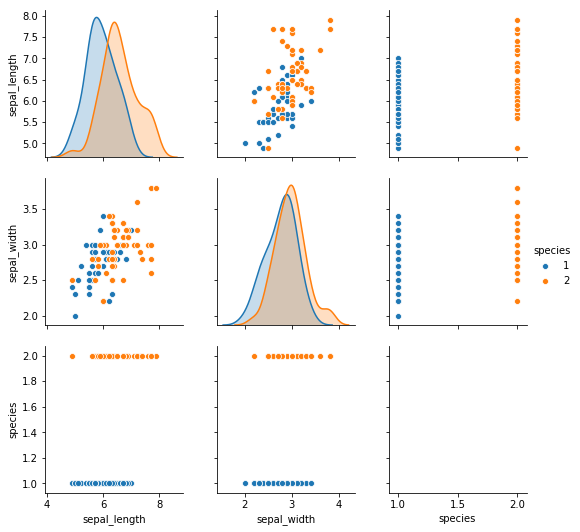

In [6]:
import seaborn as sns
sns.pairplot(df_Xy, hue="species")

## 抽出したデータの箱ひげ図（boxplot）

{'whiskers': [<matplotlib.lines.Line2D at 0x1a19f22e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19efa6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a19f22940>,
 'medians': [<matplotlib.lines.Line2D at 0x1a19efaf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a19f34390>,
 'means': []}

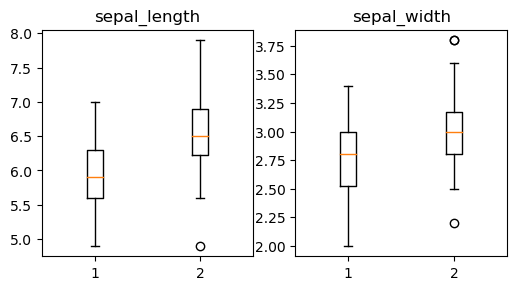

In [7]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(6, 3), dpi=100)

# 「sepal_length」の箱ひげ図
plt.subplot(row, col, 1)
plt.title('sepal_length')
plt.boxplot([df_Xy.loc[df_Xy['species']==1,'sepal_length'],df_Xy.loc[df_Xy['species']==2,'sepal_length']])

# 「sepal_width」の箱ひげ図
plt.subplot(row, col, 2)
plt.title('sepal_width')
plt.boxplot([df_Xy.loc[df_Xy['species']==1,'sepal_width'],df_Xy.loc[df_Xy['species']==2,'sepal_width']])

## 抽出したデータのバイオリン図（violinplot）

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a1a149cc0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a1a117470>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a1a149d30>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a1a155710>}

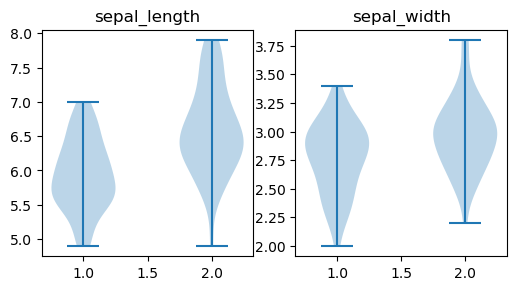

In [8]:
#1行 × 2列のグラフを設定
row = 1
col  = 2

plt.figure(figsize=(6, 3), dpi=100)

# 「sepal_length」のバイオリン図
plt.subplot(row, col, 1)
plt.title('sepal_length')
plt.violinplot([df_Xy.loc[df_Xy['species']==1,'sepal_length'],df_Xy.loc[df_Xy['species']==2,'sepal_length']])

# 「sepal_width」のバイオリン図
plt.subplot(row, col, 2)
plt.title('sepal_width')
plt.violinplot([df_Xy.loc[df_Xy['species']==1,'sepal_width'],df_Xy.loc[df_Xy['species']==2,'sepal_width']])

# 【問題3】前処理・訓練データと検証データの分割

In [9]:
X = df_Xy[['sepal_length','sepal_width']].values.tolist() # DataFrameから「sepal_length」「sepal_width」を抽出してndarrayに変換
y = df_Xy['species'].values.tolist() # DataFrameから「species」を抽出してndarrayに変換

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # 訓練データ75%、検証データ25%として分割

# 【問題4】前処理・標準化

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 【問題5】学習と推定

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k = 5 #  5-nn（デフォルト）
knc_5 = KNeighborsClassifier(n_neighbors=k) # KNeighborsClassifier
knc_5.fit(X_train_scaled, y_train)
y_pred_5 = knc_5.predict(X_test_scaled) # 予測

k = 3 #  3-nn
knc_3 = KNeighborsClassifier(n_neighbors=k) # KNeighborsClassifier
knc_3.fit(X_train_scaled, y_train)
y_pred_3 = knc_3.predict(X_test_scaled) # 予測

k = 1 #  1-nn
knc_1 = KNeighborsClassifier(n_neighbors=k) # KNeighborsClassifier
knc_1.fit(X_train_scaled, y_train)
y_pred_1 = knc_1.predict(X_test_scaled) # 予測

# 【問題6】評価

## scikit-learnを使い4種類の指標を計算する

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）： 5-nn：　{}\n".format(accuracy_score(y_test, y_pred_5)))
print("Accuracy（正解率）： 3-nn：　{}\n".format(accuracy_score(y_test, y_pred_3)))
print("Accuracy（正解率）： 1-nn：　{}".format(accuracy_score(y_test, y_pred_1)))

Accuracy（正解率）： 5-nn：　0.72

Accuracy（正解率）： 3-nn：　0.68

Accuracy（正解率）： 1-nn：　0.6


In [14]:
from sklearn.metrics import precision_score
print("Precision（適合率）： 5-nn：　{}\n".format(precision_score(y_test, y_pred_5, average='macro')))
print("Precision（適合率）： 3-nn：　{}\n".format(precision_score(y_test, y_pred_3, average='macro')))
print("Precision（適合率）： 1-nn：　{}".format(precision_score(y_test, y_pred_1, average='macro')))

Precision（適合率）： 5-nn：　0.7207792207792207

Precision（適合率）： 3-nn：　0.6794871794871795

Precision（適合率）： 1-nn：　0.6


In [15]:
from sklearn.metrics import recall_score
print("Recall（再現率）： 5-nn：　{}\n".format(recall_score(y_test, y_pred_5, average='macro')))
print("Recall（再現率）： 3-nn：　{}\n".format(recall_score(y_test, y_pred_3, average='macro')))
print("Recall（再現率）： 1-nn：　{}".format(recall_score(y_test, y_pred_1, average='macro')))

Recall（再現率）： 5-nn：　0.717948717948718

Recall（再現率）： 3-nn：　0.6794871794871795

Recall（再現率）： 1-nn：　0.5961538461538461


In [16]:
from sklearn.metrics import f1_score
print("F値： 5-nn：　{}\n".format(f1_score(y_test, y_pred_5, average='macro')))
print("F値： 3-nn：　{}\n".format(f1_score(y_test, y_pred_3, average='macro')))
print("F値： 1-nn：　{}".format(f1_score(y_test, y_pred_1, average='macro')))

F値： 5-nn：　0.7181964573268922

F値： 3-nn：　0.6794871794871795

F値： 1-nn：　0.5941558441558441


## 混同行列をscikit-learnを使い表示する

In [17]:
from sklearn.metrics import confusion_matrix
print("混同行列： 5-nn：\n{}\n".format(confusion_matrix(y_test, y_pred_5)))
print("混同行列： ３-nn：\n{}\n".format(confusion_matrix(y_test, y_pred_3)))
print("混同行列： １-nn：\n{}".format(confusion_matrix(y_test, y_pred_1)))

混同行列： 5-nn：
[[10  3]
 [ 4  8]]

混同行列： ３-nn：
[[9 4]
 [4 8]]

混同行列： １-nn：
[[9 4]
 [6 6]]


## 4種類の指標値の意味について簡単に調査して文章でまとめる

## Accuracy（正解率）
データ全体に対して，モデルがどれだけ正解できたのかを表す指標

## Precision（適合率）
正と判断したデータのうち実際に正であった割合

## Recall（再現率）
実際に正であるデータのうちどれだけを正解（再現）できたかの指標

## F値
適合率・精度（P）と再現率（R）の調和平均をとった値

# 【問題7】可視化

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 決定領域を表示する関数
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

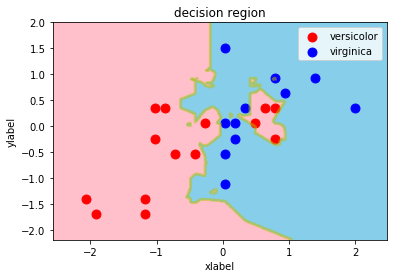

In [19]:
decision_region(X_test_scaled, y_pred_5, knc_5, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

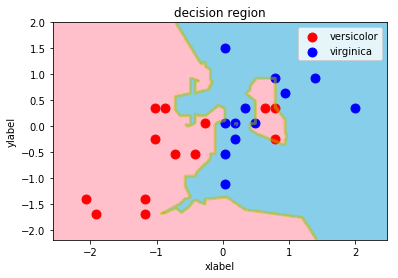

In [20]:
decision_region(X_test_scaled, y_pred_3, knc_3, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

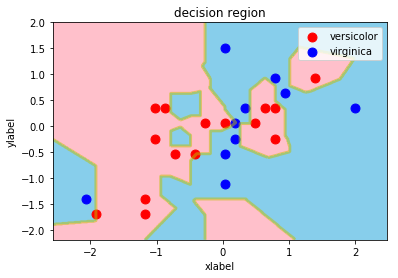

In [21]:
decision_region(X_test_scaled, y_pred_1, knc_1, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# 【問題8】他の手法の学習

## 最近傍法

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf_knc = KNeighborsClassifier() # 最近傍法のインスタンスを生成
clf_knc.fit(X_train_scaled, y_train)
y_pred_knc = clf_knc.predict(X_test_scaled) # 予測

In [23]:
ser_clf_knc = pd.Series([accuracy_score(y_test, y_pred_knc), \
                     precision_score(y_test, y_pred_knc, average='macro'), \
                     recall_score(y_test, y_pred_knc, average='macro'), \
                     f1_score(y_test, y_pred_knc, average='macro')], \
                   index = ["Accuracy（正解率）", "Precision（適合率）", "Recall（再現率）","F値"])
ser_clf_knc

Accuracy（正解率）     0.720000
Precision（適合率）    0.720779
Recall（再現率）       0.717949
F値                0.718196
dtype: float64

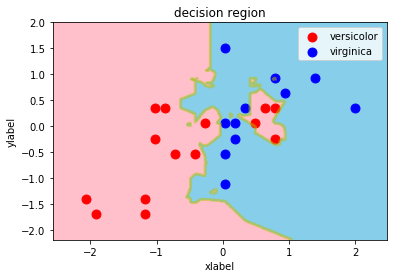

In [24]:
decision_region(X_test_scaled, y_pred_knc, clf_knc, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## ロジスティック回帰

In [25]:
from sklearn.linear_model import LogisticRegression

clf_lm = LogisticRegression(random_state=0) # ロジスティック回帰のインスタンスを生成
clf_lm.fit(X_train_scaled, y_train)
y_pred_lm = clf_lm.predict(X_test_scaled) # 予測

In [26]:
ser_clf_lm = pd.Series([accuracy_score(y_test, y_pred_lm), \
                     precision_score(y_test, y_pred_lm, average='macro'), \
                     recall_score(y_test, y_pred_lm, average='macro'), \
                     f1_score(y_test, y_pred_lm, average='macro')], \
                   index = ["Accuracy（正解率）", "Precision（適合率）", "Recall（再現率）","F値"])
ser_clf_lm

Accuracy（正解率）     0.720000
Precision（適合率）    0.733333
Recall（再現率）       0.724359
F値                0.718196
dtype: float64

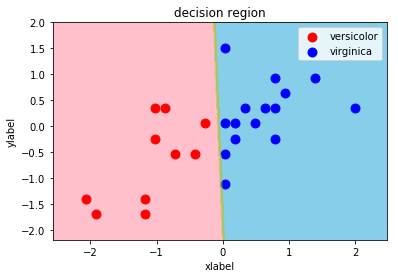

In [27]:
decision_region(X_test_scaled, y_pred_lm, clf_lm, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## SVM

In [28]:
from sklearn.svm import SVC

clf_svc= SVC(gamma='auto') # SVMのインスタンスを生成
clf_svc.fit(X_train_scaled, y_train)
y_pred_svc = clf_svc.predict(X_test_scaled) # 予測

In [29]:
ser_clf_svc = pd.Series([accuracy_score(y_test, y_pred_svc), \
                     precision_score(y_test, y_pred_svc, average='macro'), \
                     recall_score(y_test, y_pred_svc, average='macro'), \
                     f1_score(y_test, y_pred_svc, average='macro')], \
                   index = ["Accuracy（正解率）", "Precision（適合率）", "Recall（再現率）","F値"])
ser_clf_svc

Accuracy（正解率）     0.680000
Precision（適合率）    0.701389
Recall（再現率）       0.685897
F値                0.675325
dtype: float64

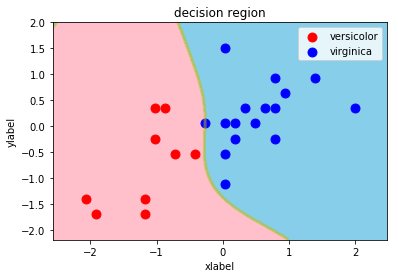

In [30]:
decision_region(X_test_scaled, y_pred_svc, clf_svc, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## 決定木

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=0) # 決定木のインスタンスを生成
clf_tree.fit(X_train_scaled, y_train)
y_pred_tree = clf_tree.predict(X_test_scaled) # 予測

In [32]:
ser_clf_tree = pd.Series([accuracy_score(y_test, y_pred_tree), \
                     precision_score(y_test, y_pred_tree, average='macro'), \
                     recall_score(y_test, y_pred_tree, average='macro'), \
                     f1_score(y_test, y_pred_tree, average='macro')], \
                   index = ["Accuracy（正解率）", "Precision（適合率）", "Recall（再現率）","F値"])
ser_clf_tree

Accuracy（正解率）     0.600000
Precision（適合率）    0.600000
Recall（再現率）       0.596154
F値                0.594156
dtype: float64

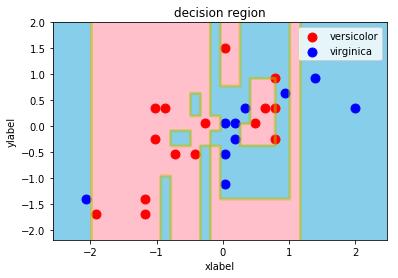

In [33]:
decision_region(X_test_scaled, y_pred_tree, clf_tree, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

## ランダムフォレスト

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0) # ランダムフォレストのインスタンスを生成
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf = clf_rf.predict(X_test_scaled) # 予測

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
ser_clf_rf = pd.Series([accuracy_score(y_test, y_pred_rf), \
                     precision_score(y_test, y_pred_rf, average='macro'), \
                     recall_score(y_test, y_pred_rf, average='macro'), \
                     f1_score(y_test, y_pred_rf, average='macro')], \
                   index = ["Accuracy（正解率）", "Precision（適合率）", "Recall（再現率）","F値"])
ser_clf_rf

Accuracy（正解率）     0.760000
Precision（適合率）    0.766667
Recall（再現率）       0.756410
F値                0.756494
dtype: float64

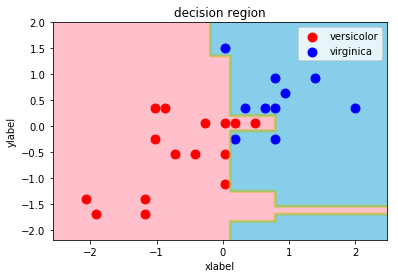

In [36]:
decision_region(X_test_scaled, y_pred_rf, clf_rf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [37]:
df_clf = pd.concat([ser_clf_knc,ser_clf_lm,ser_clf_svc,ser_clf_tree,ser_clf_rf], axis = 1)
df_clf.columns = ['最近傍法','ロジスティック回帰','SVM','決定木','ランダムフォレスト']
df_clf

,最近傍法,ロジスティック回帰,SVM,決定木,ランダムフォレスト
Accuracy（正解率）,0.720000,0.720000,0.680000,0.600000,0.760000
Precision（適合率）,0.720779,0.733333,0.701389,0.600000,0.766667
Recall（再現率）,0.717949,0.724359,0.685897,0.596154,0.756410
F値,0.718196,0.718196,0.675325,0.594156,0.756494


## 各手法の結果についての考察

指標値は「ランダムフォレスト」が最も良い値となった。次いで「ロジスティック回帰」「最近傍法」となっている。  
それぞれの決定領域についてはロジスティック回帰・決定木・ランダムフォレストの境界線は直線であるのに対し、最近傍法・SVMは曲線となっている。